In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

df = pd.read_csv('model_Mumbai_trainer.csv')
X = df.drop(columns=['Price', 'area_per_bhk', 'price_per_area'])
y = df['Price']

# Reshape y to be 2D for the scaler (needed for StandardScaler)
y = y.values.reshape(-1, 1)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['size', 'Area']),
        ('cat', OneHotEncoder(), ['Location'])
    ])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

In [20]:
X_train_transformed.shape

(3077, 104)

In [21]:
model_ANN = models.Sequential()
model_ANN.add(layers.InputLayer(shape=(X_train_transformed.shape[1],)))
model_ANN.add(layers.Dense(128, activation='relu'))
model_ANN.add(layers.Dense(64, activation='relu'))
model_ANN.add(layers.Dropout(0.3))
model_ANN.add(layers.Dense(32, activation='relu'))
model_ANN.add(layers.Dense(1))

In [22]:
model_ANN.compile(optimizer='RMSprop', loss='mean_squared_error')

history = model_ANN.fit(X_train_transformed, y_train_scaled, epochs=50, batch_size=32, validation_data=(X_test_transformed, y_test_scaled))

Epoch 1/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6117 - val_loss: 0.3000
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4095 - val_loss: 0.2681
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3025 - val_loss: 0.2906
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3150 - val_loss: 0.2634
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3424 - val_loss: 0.2550
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2765 - val_loss: 0.2708
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2517 - val_loss: 0.2947
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2750 - val_loss: 0.2624
Epoch 9/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2647 - val_loss: 0.2637
Epoch 10/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2469 - val_loss: 0.2645
Epoch 11/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2448 - val_loss: 0.3241
Epoch 12/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2518 - val_lo

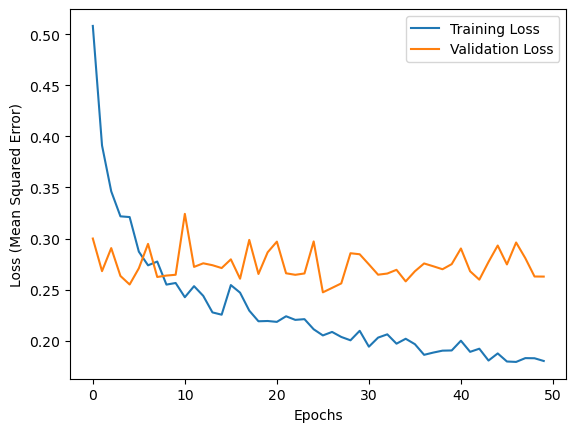

In [23]:
# Plotting the loss curve
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the test set
y_pred_scaled = model_ANN.predict(X_test_transformed)

# Inverse transform the scaled predictions to get the actual values
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Calculate MSE, MAE, and R²
mse = mean_squared_error(y_test_original, y_pred)
mae = mean_absolute_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Mean Squared Error (MSE): 46423062941876.445
Mean Absolute Error (MAE): 4454351.355844156
R² Score: 0.6405400828660959


In [25]:
compare = pd.DataFrame({
    'Actual Price': y_test_original.flatten(),
    'Predicted Price': y_pred.flatten()
})
compare

,Actual Price,Predicted Price
0,11500000.0,9290205.0
1,7500000.0,14907284.0
2,14000000.0,24965588.0
3,6000000.0,5889457.5
4,16500000.0,14751806.0
...,...,...
765,3500000.0,6320380.5
766,25000000.0,8599806.0
767,2300000.0,5717097.5
768,22400000.0,16142682.0


In [26]:
#Model Building preprocessing for inputs
dummies = pd.get_dummies(df.Location).astype(int)          # generating 1 hot encoding for Locations
dummies

,Airoli,Ambernath East,Ambernath West,Andheri,Andheri East,Andheri West,Badlapur East,Bandra East,Bandra West,Belapur,...,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
df = pd.concat([df,dummies.drop('other', axis='columns')], axis = 'columns')
df.head()                             #df9 holds the Locations as 1 hot encoded values


,Location,size,Area,Price,area_per_bhk,price_per_area,Airoli,Ambernath East,Ambernath West,Andheri,...,Vashi,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai
0,Airoli,1,400,6200000,400.0,15500.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Airoli,2,1245,14900000,622.5,11967.871486,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Airoli,2,1183,14000000,591.5,11834.319527,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Airoli,1,495,6400000,495.0,12929.292929,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Airoli,1,495,3800000,495.0,7676.767677,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df = df.drop(['Location', 'area_per_bhk', 'price_per_area'], axis='columns')
df.head()             #df10 is the final df before separating to output and input features

,size,Area,Price,Airoli,Ambernath East,Ambernath West,Andheri,Andheri East,Andheri West,Badlapur East,...,Vashi,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai
0,1,400,6200000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1245,14900000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1183,14000000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,495,6400000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,495,3800000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
X = df.drop('Price', axis='columns')    # input features
X.head()

,size,Area,Airoli,Ambernath East,Ambernath West,Andheri,Andheri East,Andheri West,Badlapur East,Bandra East,...,Vashi,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai
0,1,400,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1245,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1183,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,495,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,495,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
Y = df.Price
Y.head()

0     6200000
1    14900000
2    14000000
3     6400000
4     3800000
Name: Price, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [32]:
LR = LinearRegression()
LR.fit(X_train, Y_train)
LR.score(X_test, Y_test)

0.6344209483762069

In [33]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.66968365, 0.65330192, 0.6064873 , 0.61987343, 0.57920291])

In [34]:
def best_model_using_gridsearchcv(X, Y):
    algos = {
    'Linear_Regression': {
        'model': LinearRegression(),
        'Parameters': {}
    },
    'Lasso': {
        'model': Lasso(),
        'Parameters': {'alpha': [1, 2], 'selection': ['random', 'cyclic']}
    },
    'Decision_Tree': {
        'model': DecisionTreeRegressor(),
        'Parameters': {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 'splitter': ['best', 'random']}
    },
    'Random_Forest': {
        'model': RandomForestRegressor(),
        'Parameters': {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]}
    },
    'Gradient_Boosting': {
        'model': GradientBoostingRegressor(),
        'Parameters': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
    },
    'XGBoost': {
        'model': XGBRegressor(),
        'Parameters': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
    },
    'SVR': {
        'model': SVR(),
        'Parameters': {'kernel': ['linear', 'rbf'], 'C': [1, 10]}
    }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)   
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['Parameters'], cv=cv, return_train_score=False)
        gs.fit(X, Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_,
            'best_estimator': gs.best_estimator_
        })
    
    scores_df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params', 'best_estimator'])
    best_model_row = scores_df.loc[scores_df['best_score'].idxmax()]
    best_model_instance = best_model_row['best_estimator']
    return scores_df, best_model_instance  # Return both scores and the best model

scores_df, best_model = best_model_using_gridsearchcv(X_train, Y_train)


# Display the scores DataFrame
scores_df

,model,best_score,best_params,best_estimator
0,Linear_Regression,0.638595,{},LinearRegression()
1,Lasso,0.638598,"{'alpha': 2, 'selection': 'cyclic'}",Lasso(alpha=2)
2,Decision_Tree,0.561858,"{'criterion': 'squared_error', 'splitter': 'ra...",DecisionTreeRegressor(splitter='random')
3,Random_Forest,0.646930,"{'max_depth': 20, 'n_estimators': 50}","(DecisionTreeRegressor(max_depth=20, max_featu..."
4,Gradient_Boosting,0.655329,"{'learning_rate': 0.1, 'n_estimators': 200}",([DecisionTreeRegressor(criterion='friedman_ms...
5,XGBoost,0.662319,"{'learning_rate': 0.1, 'n_estimators': 200}","XGBRegressor(base_score=None, booster=None, ca..."
6,SVR,0.449632,"{'C': 10, 'kernel': 'linear'}","SVR(C=10, kernel='linear')"


In [35]:
from sklearn.metrics import r2_score, mean_absolute_error

xgb_model = XGBRegressor(n_estimators=170, learning_rate=0.09, random_state=42)

# Train the model with evaluation set and early stopping
xgb_model.fit(X_train, Y_train, 
              eval_set=[(X_test, Y_test)],  # Validation set for early stopping
              verbose=True)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Calculate the R² score and Mean Absolute Error
r2 = r2_score(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)

print(f"R² Score: {r2}")
print(f"Mean Absolute Error: {mae}")

[0]	validation_0-rmse:11985365.51657
[1]	validation_0-rmse:11386204.59742
[2]	validation_0-rmse:10894835.34264
[3]	validation_0-rmse:10459506.46375
[4]	validation_0-rmse:10112324.76312
[5]	validation_0-rmse:9809090.25348
[6]	validation_0-rmse:9565837.57357
[7]	validation_0-rmse:9330571.35144
[8]	validation_0-rmse:9114211.26768
[9]	validation_0-rmse:8945183.67923
[10]	validation_0-rmse:8812754.12888
[11]	validation_0-rmse:8672750.92216
[12]	validation_0-rmse:8567857.45776
[13]	validation_0-rmse:8436197.72271
[14]	validation_0-rmse:8331898.10567
[15]	validation_0-rmse:8257066.49127
[16]	validation_0-rmse:8175593.36502
[17]	validation_0-rmse:8111904.11258
[18]	validation_0-rmse:8073476.69003
[19]	validation_0-rmse:8028142.79458
[20]	validation_0-rmse:7988220.91151
[21]	validation_0-rmse:7956630.10226
[22]	validation_0-rmse:7943786.85508
[23]	validation_0-rmse:7920856.74248
[24]	validation_0-rmse:7896301.75439
[25]	validation_0-rmse:7884516.66751
[26]	validation_0-rmse:7872568.12803
[27]	v

In [36]:
def predict_price(Location, size, Area):
    loc_index = np.where(X.columns==Location)[0][0]
    x=np.zeros(len(X.columns))
    x[0] = size
    x[1] = Area
    if loc_index >= 0:
        x[loc_index] = 1
    return LR.predict([x])[0]

In [37]:
predict_price('Airoli', 2, 900)

C:\Users\sunde\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


13592662.628146343

In [38]:
def predict_price_xgb(Location, size, Area, model=best_model):
    loc_index = np.where(X.columns==Location)[0][0]
    x=np.zeros(len(X.columns))
    x[0] = size
    x[1] = Area
    if loc_index >= 0:
        x[loc_index] = 1
    return model.predict([x])[0]

In [39]:
predict_price_xgb('Airoli', 2, 900)

17773780.0